In [15]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.decomposition import PCA
%store -r

In [3]:
# Checking active variables
", ".join(dir())

'In, LogisticRegression, Out, _, _2, __, ___, __builtin__, __builtins__, __doc__, __loader__, __name__, __package__, __spec__, __vsc_ipynb_file__, _dh, _i, _i1, _i2, _i3, _ih, _ii, _iii, _oh, exit, get_ipython, metrics, mlp_trained, np, os, pd, plt, quit, sb, sys'

In [4]:
def generate_confusion_matrix(y_true, y_pred):
    # visualize the confusion matrix
    ax = plt.subplot()
    c_mat = metrics.confusion_matrix(y_true, y_pred)
    sb.heatmap(c_mat, annot=False, fmt='g', ax=ax)

    ax.set_xlabel('Predicted labels', fontsize=15)
    ax.set_ylabel('True labels', fontsize=15)
    ax.set_title('Confusion Matrix', fontsize=15)

In [5]:
# Fetch dataset
data_train = pd.read_csv("./EMNIST/emnist-balanced-train.csv", header=None)
data_test = pd.read_csv("./EMNIST/emnist-balanced-test.csv", header=None)

cols = ['CHAR']
for i in range(1, 785):
    cols.append(str(i))
data_train.columns = cols
data_test.columns = cols
print(data_train.shape)
print(data_test.shape)

X_train = data_train.iloc[:,1:]
y_train = data_train["CHAR"]
X_test = data_test.iloc[:,1:]
y_test = data_test["CHAR"]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
y_test.head()

(112800, 785)
(18800, 785)
(112800, 784)
(112800,)
(18800, 784)
(18800,)


0    41
1    39
2     9
3    26
4    44
Name: CHAR, dtype: int64

In [13]:
# Fetch corresponding characters for labels
corresponding = []
with open("./EMNIST/emnist-balanced-mapping.txt", "r") as file:
    for line in file:
        pairs = line.split()
        corresponding.append(chr(int(pairs[1])))

In [47]:
N = 700
pca = PCA(n_components=N)
X_train_reduced = pca.fit_transform(X_train)

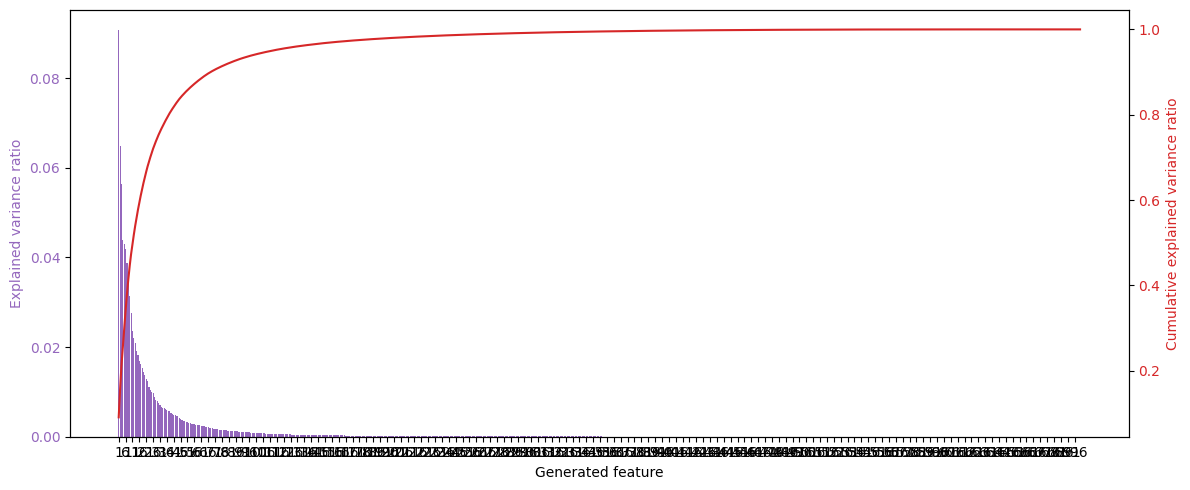

In [48]:
fig, ax1 = plt.subplots(figsize=(12, 5))
color = 'tab:purple'
ax1.bar(1+np.arange(N), pca.explained_variance_ratio_, color=color)
ax1.set_xticks(1+np.arange(N, step=5))
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel("Explained variance ratio", color=color)
ax1.set_xlabel("Generated feature")

ax2 = ax1.twinx()
color = 'tab:red'
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(1+np.arange(N), np.cumsum(pca.explained_variance_ratio_), color=color)
ax2.set_ylabel("Cumulative explained variance ratio", color=color)
fig.tight_layout()
plt.show()

In [53]:
# Checking the slope from right to left
points = list(enumerate(np.cumsum(pca.explained_variance_ratio_).tolist(), start = 1))[::-1]
# Calculate instantaneous slope (pseudo-derivative)
def getSlope(curr, next):
    x1 = curr[0]
    x2 = next[0]
    y1 = curr[1]
    y2 = next[1]
    return (y2 - y1)/(x2 - x1)
scores = []
i = 0
while i < len(points) - 1:
    slope = getSlope(points[i], points[i + 1])
    stop = points[i]
    size_reduc = (1 - stop[0]/784)
    info_ret = stop[1]
    #print("Feature size reduction: " + str(size_reduc * 100) + "%")
    #print("Information retained: " + str(info_ret * 100) + "%")
    score = size_reduc * info_ret
    #print("Score: " + score)
    scores.append([stop[0], score, size_reduc, info_ret])
    i += 1


Feature size reduction: 10.71428571428571%
Information retained: 99.99999500063446%


TypeError: can only concatenate str (not "float") to str